In [1]:
import matplotlib.pyplot as plt
import yt.units as u
import numpy
from scipy.integrate import odeint

In [2]:
def get_reaction_rates(T):
    A = 12.0 / (12.0 + 1.0)
    Z1 = 6.0
    Z2 = 1.0

    mH = 1.00794 * u.amu_cgs
    mN = 14.0067 * u.amu_cgs
    mC = 12.0107 * u.amu_cgs
    dE = (mC + mH - mN)*u.c*u.c
    
    kT = u.boltzmann_constant_cgs*u.K * T
    
    E0 = (14.0 * kT *\
            ((Z1*Z2)**2.0 * A * (T/1.0e6)**-1)**(1./3.)).in_units('eV')
    E0 /= 1000.0

    S0 = 1.20 + 5.81e-3 * (E0/u.eV)

    E0 *= 1000.0
    tau = 3.0 *E0 /kT 

    sigma_v = 7.208e-19 / A /Z1/Z2 * (S0) * tau**2 * numpy.exp(-tau)




    detail_balance = (1.0 / u.planck_constant_cgs**3.0 * \
                (2.0*numpy.pi*mC*mH*kT / mN)**(3.0/2.0))**-1 \
                * numpy.exp(  dE / kT )
    
    # this is negligble
    R_N_gamma = detail_balance*sigma_v

    return float(sigma_v), float(R_N_gamma)

In [3]:
mH = 1.00794 * u.amu_cgs
mN = 14.0067 * u.amu_cgs
mC = 12.0107 * u.amu_cgs

rho = 15.0*u.gram / u.cm**3

# initial condition
n_H0 = 0.7*rho/mH
n_C0 = 0.01*rho/mC
n_N0 = 0.0*rho/mN

def get_temperature(n_H, n_C, n_N):
    
    # P = sum nKT = constant
    # T_now = T_0 * n_0 / n_now
    
    n0 = (n_H0 + n_C0 + n_N0)
    
    n_now = n_H + n_C+ n_N
    
    # initial temperature
    T0 = 3.0e7
    T_now = numpy.array([n0* T0 / n_now])

    return T_now

In [4]:
# this should be the constant througout
constant1 = n_C0 - n_H0
constant2 = n_C0 + n_N0

constant1 = float(constant1)
constant2 = float(constant2) 

def get_nH_nN(nC):
    
    nH = -constant1 + nC
    nN = constant2 - nC
    return nH, nN


In [5]:
def rhs_func(nC, time):
    
    nH, nN = get_nH_nN(nC)
    T = get_temperature(nH, nC, nN)    
    sigma_v, R_N_gamma =  get_reaction_rates(T)
    
    dnC_dt = -sigma_v*nH*nC + R_N_gamma*nN
    
    return dnC_dt

In [10]:
y0 = [n_C0]
time_array = numpy.logspace(-5,12,100)
sol = odeint(rhs_func, y0, time_array)

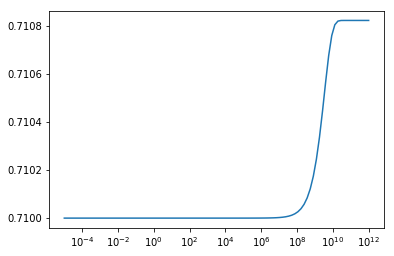

In [14]:
plt.semilogx(time_array, nC*mC/rho+nH*mH/rho+nN*mN/rho, label='n_C')


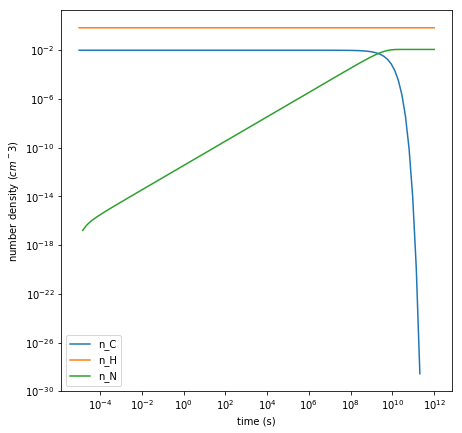

In [12]:
nC = sol[:,0]
nH, nN = get_nH_nN(nC)

plt.figure(figsize=(7,7))
plt.loglog(time_array, nC*mC/rho, label='n_C')
plt.semilogx(time_array, nH*mH/rho, label ='n_H')
plt.semilogx(time_array, nN*mN/rho, label= 'n_N')
plt.xlabel('time (s)')
plt.ylabel('number density ($cm^-3$)')
plt.legend()

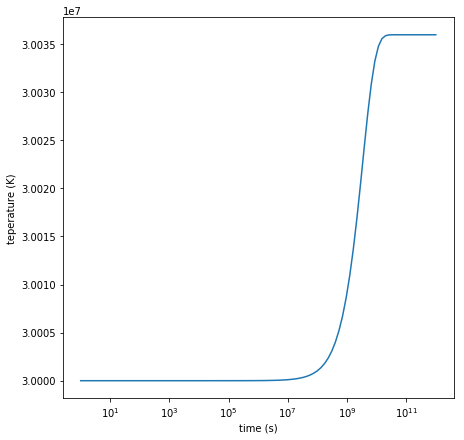

In [9]:
nC = sol[:,0]
nH, nN = get_nH_nN(nC)
T = get_temperature(nH, nC, nN)

plt.figure(figsize=(7,7))
plt.xlabel('time (s)')
plt.ylabel('teperature (K)')
plt.semilogx(time_array, T[0,:])

In [16]:
get_reaction_rates(n_C0.v)

(5.343703002929732e-17, 5.425384034250557e-70)

In [24]:
n_H0


6.27343726276e+24 cm**(-3)

In [20]:
rhs_func(n_C0.v, 0)/1e12

-2.2024367049735738

In [26]:
-constant1+3.76e21

6.269676292342266e+24

In [27]:
constant2/2 / _

0.0005997893721572839

In [34]:
pi = numpy.pi
Q = (mH + mC - mN)*u.c*u.c
T = 3e7

(2.0*pi * mC*mH*u.boltzmann_constant*u.K *T / mN)**(3./2.) / u.planck_constant**3.0 * numpy.exp( - Q / (u.boltzmann_constant * u.K * T) ) - 0.0005997893721572839*(u.cm**-3)


/home/kwoksun2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


inf g**(3/2)/(erg**(3/2)*s**3)

In [35]:
- Q / (u.boltzmann_constant * u.K * T)

356015.829747 cm**2*g/(erg*s**2)